## PCA Implentation Project for Milestone 2 assignment BAN 6420

In [1]:
# importing the necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [26]:
# Print dataset information
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {np.bincount(y)}")

print("\nFeature names:")
for i, feature_name in enumerate(cancer.feature_names):
    print(f"{i+1}. {feature_name}")

print("\nTarget names:")
for i, target_name in enumerate(cancer.target_names):
    print(f"{i}. {target_name}")

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = y
print(df.head())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

Dataset Information:
Number of samples: 569
Number of features: 30
Number of classes: 2
Class distribution: [212 357]

Feature names:
1. mean radius
2. mean texture
3. mean perimeter
4. mean area
5. mean smoothness
6. mean compactness
7. mean concavity
8. mean concave points
9. mean symmetry
10. mean fractal dimension
11. radius error
12. texture error
13. perimeter error
14. area error
15. smoothness error
16. compactness error
17. concavity error
18. concave points error
19. symmetry error
20. fractal dimension error
21. worst radius
22. worst texture
23. worst perimeter
24. worst area
25. worst smoothness
26. worst compactness
27. worst concavity
28. worst concave points
29. worst symmetry
30. worst fractal dimension

Target names:
0. malignant
1. benign

First few rows of the dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90    

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

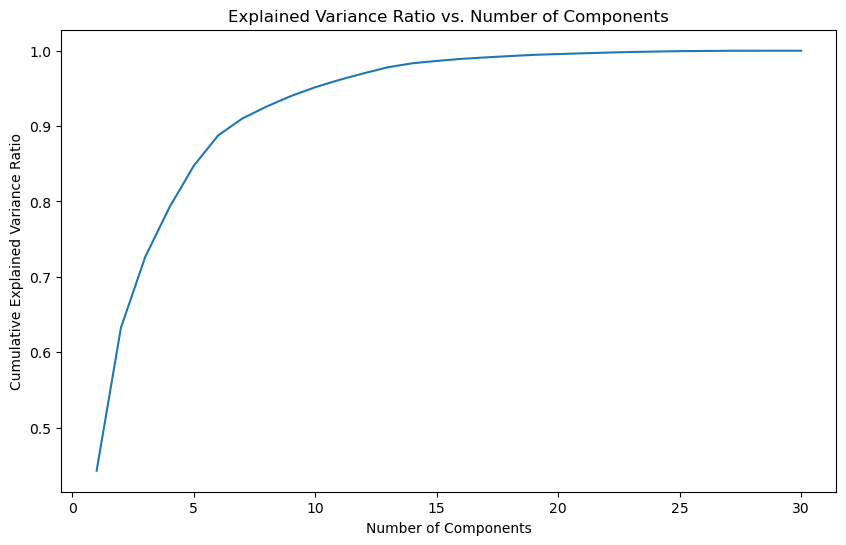

In [30]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

## Dimensionality Reduction: Reducing the dataset into 2 PCA components for the project. 

In [50]:
# Reduce to 2 PCA components
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

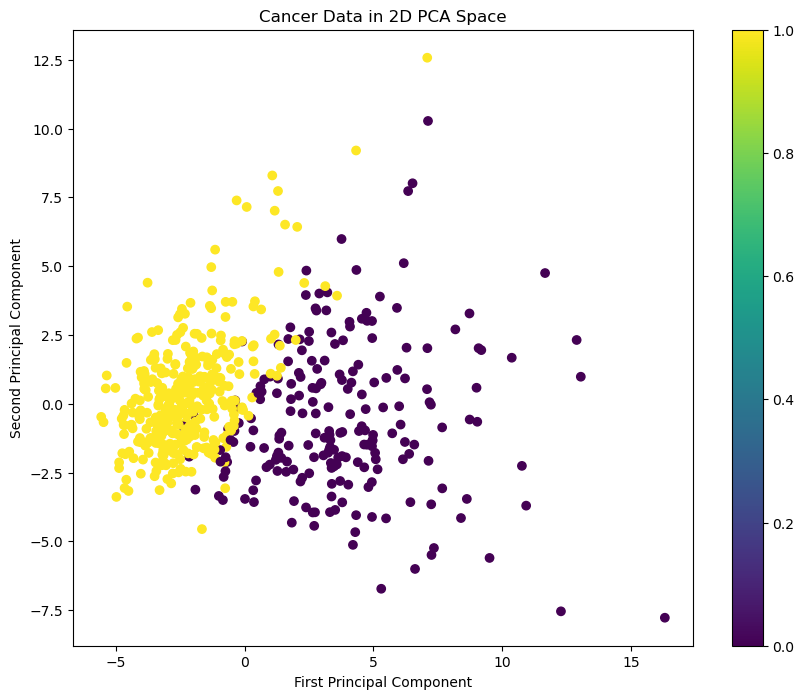

In [52]:
# Plot the data points in 2D PCA space
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cancer Data in 2D PCA Space')
plt.colorbar(scatter)
plt.show()

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

In [56]:
# Implement logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [40]:
# Make predictions
y_pred = lr.predict(X_test)

In [42]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
# Print the most important features
feature_importance = abs(pca_2.components_).sum(axis=0)
sorted_idx = np.argsort(feature_importance)[::-1]
print("\nMost important features:")
for idx in sorted_idx[:5]:
    print(f"{cancer.feature_names[idx]}: {feature_importance[idx]:.4f}")


Most important features:
mean radius: 0.4528
mean area: 0.4521
worst radius: 0.4479
worst area: 0.4442
mean perimeter: 0.4427


In [44]:
# Calculating variance ratio
variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(variance_ratio)

In [46]:
# Print variance ratio for each component
print("\nVariance Ratio for each Principal Component:")
for i, ratio in enumerate(variance_ratio[:10], 1):  # Print first 10 components
    print(f"PC{i}: {ratio:.4f}")


Variance Ratio for each Principal Component:
PC1: 0.4427
PC2: 0.1897
PC3: 0.0939
PC4: 0.0660
PC5: 0.0550
PC6: 0.0402
PC7: 0.0225
PC8: 0.0159
PC9: 0.0139
PC10: 0.0117


In [48]:
print("\nCumulative Variance Ratio:")
for i, ratio in enumerate(cumulative_variance_ratio[:10], 1):  # Print first 10 components
    print(f"PC1-PC{i}: {ratio:.4f}")


Cumulative Variance Ratio:
PC1-PC1: 0.4427
PC1-PC2: 0.6324
PC1-PC3: 0.7264
PC1-PC4: 0.7924
PC1-PC5: 0.8473
PC1-PC6: 0.8876
PC1-PC7: 0.9101
PC1-PC8: 0.9260
PC1-PC9: 0.9399
PC1-PC10: 0.9516
